# Kivy Workshop / Taller de Kivy
### Objetivo: Construir nuestra primera aplicación para Android con Kivy

# Antes de emepzar

* Este material está hecho sobre Jupyter Notebook, se puede [descargar de Github](bit.ly/tallerkivy).
* La mayoría de los ejemplos de este notebook están preparados como script ejecutables, de manera que al ejecutar 

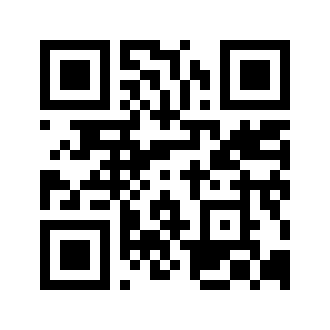

In [112]:
!qr "http://bit.ly/tallerkivy" > images/qr.png
from IPython.display import Image
Image('images/qr.png')

# Kivy 

Kivy es una biblioteca Open source para desarrollo rápido de aplicaciones que hacen uso de interfases de usuarios inovadoras (NUI) como aplicaiones multi touch.
<img src="./images/gs-introduction.png">

# Características
* Acelerado por GPU
* Lenguaje de definición de interfaces sencillo

# Arquitectura
![Arquitectura de Kivy](images/architecture.png)

# Antes de llegar a Android
### Repasemos algunas caracerísticas de Kivy

* Aplicación
* Propiedades
* Lenguaje de Kivy (Kv)

# Primera aplicación Kivy
#### Sin android todavía

In [109]:
%%python
# encoding: utf-8
from __future__ import print_function
from kivy.app import App
from kivy.uix.button import Button

class MyApp(App):
    def saludar(self, ui):
        print(u"Clickeado")
    def build(self):
        btn = Button(
            text="Con F1 verás algo más\n"
            "con Esc salis", 
            on_press=self.saludar,
        )
        return btn
if __name__ == "__main__":
    MyApp().run()

Clickeado
Clickeado
Clickeado
Clickeado
Clickeado
Clickeado
Clickeado


# Agregando Layouts

In [76]:
%%script python2 --err stderr
# encoding: utf-8
from __future__ import print_function
from kivy.app import App
from kivy.uix.boxlayout import BoxLayout
from kivy.uix.button import Button
from kivy.uix.label import Label

class MyWidget(BoxLayout):
    def __init__(self):
        super(MyWidget, self).__init__()
        callback = App.get_running_app().saludar
        btn = Button(text=u"alegría a tu", 
                     on_press=callback
                    )
        self.add_widget(Label(text="Dale"))
        self.add_widget(btn)
        self.add_widget(Label(text="cuerpo"))
        
class MyApp(App):
    def saludar(self, ui):
        print("Macarena")
    def build(self):
        return MyWidget()
if __name__ == "__main__":
    MyApp().run()

Macarena


In [64]:
stderr

'  File "<stdin>", line 11\nSyntaxError: Non-ASCII character \'\\xc3\' in file <stdin> on line 11, but no encoding declared; see http://python.org/dev/peps/pep-0263/ for details\n'

# Utilizando las propiedades

In [56]:
%%script python2 --err stderr
from __future__ import print_function
from kivy.app import App
from kivy.uix.boxlayout import BoxLayout
from kivy.uix.button import Button

class MyWidget(BoxLayout):
    def __init__(self):
        super(MyWidget, self).__init__()
        callback = App.get_running_app().saludar
        btn1 = Button(text=self.orientation, 
                     on_press=callback
                    )
        self.add_widget(btn1)
        btn2 = Button(text="Cambiar propiedad orientation", on_press=self.change_layout)
        self.add_widget(btn2)
    def change_layout(self, ui):
        if self.orientation == 'horizontal':
            self.orientation = 'vertical'
        else:
            self.orientation = 'horizontal'

class MyApp(App):
    def saludar(self, ui):
        print("Hola Kivy")
    def build(self):
        return MyWidget()
if __name__ == "__main__":
    MyApp().run()

Hola Kivy
Hola Kivy
Hola Kivy


# Propiadades en Kivy

Las propiedades son el mecanismo de hacer **programación reactiva** o implementar el patrón `Observer` en Kivy.

Lo que en Python haríamos de la siguiente forma:
```python
class MyClass(object):
    def __init__(self):
        super(MyClass, self).__init__()
        self.numeric_var = 1
```
en Kivy, se implementaría de esta manera:
```python
class MyClass(EventDispatcher):
    numeric_var = NumericProperty(1)
```

Las propiedades que implementa Kivy son:

* [NumericProperty](https://kivy.org/docs/api-kivy.properties.html#kivy.properties.NumericProperty)
* [StringProperty](https://kivy.org/docs/api-kivy.properties.html#kivy.properties.StringProperty) 
* [ListProperty](https://kivy.org/docs/api-kivy.properties.html#kivy.properties.ListProperty)
* [ObjectProperty](https://kivy.org/docs/api-kivy.properties.html#kivy.properties.ObjectProperty)
* [BooleanProperty](https://kivy.org/docs/api-kivy.properties.html#kivy.properties.BooleanProperty)
* [BoundedNumericProperty](https://kivy.org/docs/api-kivy.properties.html#kivy.properties.BoundedNumericProperty)
* [OptionProperty](https://kivy.org/docs/api-kivy.properties.html#kivy.properties.OptionProperty)
* [ReferenceListProperty](https://kivy.org/docs/api-kivy.properties.html#kivy.properties.ReferenceListProperty)
* [AliasProperty](https://kivy.org/docs/api-kivy.properties.html#kivy.properties.AliasProperty)
* [DictProperty](https://kivy.org/docs/api-kivy.properties.html#kivy.properties.DictProperty)

# El lenguaje de Diesño `Kv`

Kivy proveé un lenguaje de diseño preparado para hacer GUIs de manera **simple** y **escalable**. 

Simplifica la separación de la interfase de la implementación de la lógica, adhiriendose al principio de separación de responsabilidades.

![](images/gs-lang.png)


## Utilización del lenguaje 

Exiten varias formas de vincular un archivo `kv` a una aplicación o widget:

* Utilizando el mismo nombre que la aplicación **`my.kv -> MyApp`**

* Utilizando la clase **Builder**
    + `Builder.load_file('ruta/a/archivo.kv')`
    + `Builder.load_string(cadena)`

## Reglas
Existen dos tipos de reglas, las de elemento raíz **root** y las de **clase**: 
### root
```yaml
clase_root:
```
### clases
```yaml
<Clase>:
```

### Variables Globales provistas por Kivy

* **`app`** referencia a la aplicación
* **`root`** referencia al widget raíz
* **`self`** referencia al widget actual

## Gerarquía

```yaml

MyRootWidget:
    BoxLayout:
        Button:
        Button:
```
es equivalente a:

```python
root = MyRootWidget()
box = BoxLayout()
box.add_widget(Button())
box.add_widget(Button())
root.add_widget(box)
```

## Argumentos
La expresión `grid = GridLayout(cols=3)` se puede definir en kv de la siguiente manera:

```yaml
GridLayout:
    cols: 3
```

In [89]:
%%script python2 --err stderr
from kivy.app import App
from kivy.lang import Builder
from kivy.uix.gridlayout import GridLayout

class MyGrid(GridLayout):
    pass

Builder.load_string('''
<MyGrid>:
    size: root.size
    pos: root.pos
    cols: 2
    Label:
        text: ":)"
    Button:
        text: "Layout"
    Button:
        text: "en"
    Button:
        text: "kv"
''')

class MyApp(App):
    def build(self):
        return MyGrid()

MyApp().run()


### Argumentos Observables

La expresión: 

```python
grid = GridLayout(cols=len(self.data))
self.bind(data=grid.setter('cols'))
```

puede escribirse en kv de la siguiente manera:

```yaml
GridLayout:
    cols: len(root.data)
```

## Referencias

Se pueden definir atributos ID para los widgets, estos son útiles para hacer referencias tanto en Python como en el lenguaje Kv.

El siguiente ejemplo combina atributos observables y referencias por `id`.


In [96]:
%%script python2 --err stderr
from kivy.app import App
from kivy.lang import Builder
from kivy.uix.boxlayout import BoxLayout

class MyLaoyout(BoxLayout):
    pass

Builder.load_string('''
<MyLaoyout>:
    size: root.size
    pos: root.pos
    Slider:
        min: 0
        max: 10
        id: my_slider
    Label:
        text: '%s' % my_slider.value
''')

class MyApp(App):
    def build(self):
        return MyLaoyout()

MyApp().run()


## Manejo de eventos

Podemos definir de la siguiente manera un *handler* ante un evento de click:
```yaml
Button:
    text: "Hola"
    on_press: app.metodo()
```

In [111]:
%%script python2 --err stderr
# encoding: utf-8
from kivy.app import App
from kivy.lang import Builder
from kivy.uix.boxlayout import BoxLayout
from kivy.uix.popup import Popup
from kivy.uix.label import Label

class MyLaoyout(BoxLayout):
    def saludar(self, ui):
        pass

Builder.load_string(u'''
<MyLaoyout>:
    size: root.size
    pos: root.pos
    Slider:
        min: 0
        max: 10
        id: my_slider
    Button:
        text: 'El slider está %s' % my_slider.value
        on_press: root.saludar()
''')

class MyApp(App):
    def build(self):
        return MyLaoyout()
    
    def saludar(self):
        popup = Popup(title='Test popup',
            content=Label(text='Hello world'),
            size_hint=(None, None), size=(400, 400))
        popup.open()

MyApp().run()

In [104]:
print stderr

[INFO              ] [Logger      ] Record log in /Users/nahuel/.kivy/logs/kivy_16-11-20_1.txt
[INFO              ] [Kivy        ] v1.9.1
[INFO              ] [Python      ] v2.7.12 (default, Oct 11 2016, 05:20:59) 
[GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.38)]
[INFO              ] [Factory     ] 179 symbols loaded
[INFO              ] [Image       ] Providers: img_tex, img_imageio, img_dds, img_gif, img_sdl2, img_pil (img_ffpyplayer ignored)
[INFO              ] [OSC         ] using <multiprocessing> for socket
[INFO              ] [Window      ] Provider: sdl2
[INFO              ] [GL          ] OpenGL version <2.1 INTEL-10.20.23>
[INFO              ] [GL          ] OpenGL vendor <Intel Inc.>
[INFO              ] [GL          ] OpenGL renderer <Intel Iris OpenGL Engine>
[INFO              ] [GL          ] OpenGL parsed version: 2, 1
[INFO              ] [GL          ] Shading version <1.20>
[INFO              ] [GL          ] Texture max size <16384>
[INFO              ] [